## Understanding Crimes in Human race

This is an attempt to understand the correlations of various variables using R, in a dataset recorded for the period of 35 years.

** (Assumption is made that the dataset records applies and holds true for entire world and not just for the USA)

In [1]:
hc<-read.csv("E:/Analytics/Datasets/hc.csv",header=T)

This dataset records the homicide crimes over the period of 1980 to 2015. It has been downloaded for the analysis from the link : <https://www.kaggle.com/murderaccountability/homicide-reports>

### Preprocessing the dataset

** Here, we are not going to smooth the data for noise. That will be done prior to using data for predictive model. Noise reduction will leave us a small dataset.

In [2]:
as.data.frame(sapply(hc,class))

,"sapply(hc, class)"
Record.ID,integer
Agency.Code,factor
Agency.Name,factor
Agency.Type,factor
City,factor
State,factor
Year,integer
Month,factor
Incident,integer
Crime.Type,factor


Most number of the variables in the dataset are of Categorical in nature.

Let's check the dataset for the "na"

In [3]:
sum(is.na(hc))

[1] 1

"na" fileds will create a problem while plotting the data and using few of the correlation algorithms. Let's **omit** all "na" values in next process

In [4]:
hc.1<-na.omit(hc)

For this analysis we'll skip using the first five columns. There is no particular reason behind this step, though including those five columns will not help the analysis any better.

In [5]:
hc.1<-hc[,-c(1:5)]

In [6]:
dim(hc.1)

[1] 638454     19

Now let's find out how the dataset looks like after the preprocessing step.

In [7]:
head(hc.1)

State,Year,Month,Incident,Crime.Type,Crime.Solved,Victim.Sex,Victim.Age,Victim.Race,Victim.Ethnicity,Perpetrator.Sex,Perpetrator.Age,Perpetrator.Race,Perpetrator.Ethnicity,Relationship,Weapon,Victim.Count,Perpetrator.Count,Record.Source
Alaska,1980,January,1,Murder or Manslaughter,Yes,Male,14,Native American/Alaska Native,Unknown,Male,15,Native American/Alaska Native,Unknown,Acquaintance,Blunt Object,0,0,FBI
Alaska,1980,March,1,Murder or Manslaughter,Yes,Male,43,White,Unknown,Male,42,White,Unknown,Acquaintance,Strangulation,0,0,FBI
Alaska,1980,March,2,Murder or Manslaughter,No,Female,30,Native American/Alaska Native,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown,0,0,FBI
Alaska,1980,April,1,Murder or Manslaughter,Yes,Male,43,White,Unknown,Male,42,White,Unknown,Acquaintance,Strangulation,0,0,FBI
Alaska,1980,April,2,Murder or Manslaughter,No,Female,30,Native American/Alaska Native,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown,0,1,FBI
Alaska,1980,May,1,Murder or Manslaughter,Yes,Male,30,White,Unknown,Male,36,White,Unknown,Acquaintance,Rifle,0,0,FBI


## Understanding correlations and implications

Now, let's first understand what sex is the most victimized over these years.

In [8]:
table(hc.1$Victim.Sex)/nrow(hc.1)*100


    Female       Male    Unknown 
22.4518916 77.3939861  0.1541223 

This means that, in the dataset 77.4% of the victims are of male sex. This could mean that the extreme incidents of rage or anger which leads to a homicide crime occurs mostly in males. This holds true even in Chimps. This artical <http://www.bbc.com/news/science-environment-29237276> notes that this phenomenon.

For an alien outsider race, just this analysis is enough to undestand a typical characteristic of the Human race. Many more conclusions can be made using the above one figures; e.g., in Humans, male sex should more involved in cultural and societal structure leading to a cut throat competition for scarce resources available to demonstrate the domination of any single male over the group or any single individual.

Now, let's understands the relative effect of the above deduction. If the males denote any domination in being the Victims in the dataset, the domination should also verify the same for the Perpetrators.

In [9]:
table(hc.1$Perpetrator.Sex)/nrow(hc.1)*100


   Female      Male   Unknown 
 7.603993 62.579450 29.816557 

If the Crime is assumed/understood as a social tool to establish the territory, gang and domination in Chimps or to express the most extreme Human emotions; we can dig down the roles and responsibilities of males in Chimps and males in humans. The above figures suggests that, since long, the few of the tools in social structures, over the evolutions, are more acceptable in males than in females.

There are well noted and understood evidences, according to a school of thought which advocates Extinction by violence of Denisovans by Neanderthals. Most of the wars fought were led by males.

** References are understood from book: The Sapiens by Yuval Harrari

Let's now understand the environmental effect on the Crime rates. If this effect holds true, the rates should change over the months.

In [10]:
sort(table(hc.1$Month)/nrow(hc.1)*100,decreasing=T)


     July    August  December September      June   October       May   January 
 9.193458  9.095722  8.643849  8.476257  8.404991  8.403111  8.363014  8.290026 
    March     April  November  February 
 8.057589  8.020781  7.833924  7.217278 

Figures show kind of an even distribution of the crime rates (near about 8%) over the months. Although, there can be a significant effect of environmental condition playing a role on one month over the others, we will exclude those for this analysis.

** (These effects are considered significant in nature as the change of just 0.097% in Crime rate compared to August in July (9.193458-9.095722) would convert into a 619 incidents July than in August. One can further understand the states where the number of crimes are higher in July as compared to August)

** (One could also find out a typical timeline when these 619 incidents took place over the recorded 35 years to take into account of any socio eco political effect playing a role)

Let's find out the top 10 States with highest numbers of recorded Crimes.

In [11]:
head(sort(table(hc.1$State)/nrow(hc.1)*100,decreasing=T),n=10)


    California          Texas       New York        Florida       Michigan 
     15.628847       9.725838       7.716766       5.820936       4.455763 
      Illinois   Pennsylvania        Georgia North Carolina      Louisiana 
      4.052132       3.796045       3.302979       3.193652       3.074458 

This shows that the CA state has a crime rate almost 1.6 times than the second in line state of TX. There can be ecological and socio economic explanation factors of such a high number of crimes in the state of CA, but for our further analysis we choose not to drill down into these factors.

Let's understand the distribution of Crime rates over the Victim Race

(For this we'll use the help of **dplyr** package in R)

In [12]:
require(dplyr)

Loading required package: dplyr

Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



In [13]:
hc.1 %>% group_by(Victim.Race) %>% count(sort=T)%>% mutate(percentage=n/nrow(hc.1)*100)

Victim.Race,n,percentage
White,317422,49.7172858
Black,299899,46.9726871
Asian/Pacific Islander,9890,1.5490544
Unknown,6676,1.0456509
Native American/Alaska Native,4567,0.7153217


This table show that the Crime rates are concentrated over just White and Black race. The Asian Pacific and Native Americans have a Victimization rate of ~ 1%. This could mean either both of the race have low numbers in populations, or could mean that the socio economical shares of both the race are limited.

Again, we'll choose to move forward and not to analyse playing factors for Victim Race.

It will be meaningful to understand if the Ethnicity of the Victims have a concentrated distribution or not.

In [14]:
hc.1 %>% group_by(Victim.Ethnicity) %>% count(sort=T)%>% mutate(percentage=n/nrow(hc.1)*100)

Victim.Ethnicity,n,percentage
Unknown,368303,57.68669
Not Hispanic,197499,30.93394
Hispanic,72652,11.37936


Well, this doesn't help much; though we can see that the "Not Hispanic" population showcase a crime rate 2.7 times more than those are of "Hispanic". This could help us to reiterate our earlier hypothesis on crime rates based on Race.

Let's understand that if the number of crimes solved have any concentration over the Victim's ethnicity or not.

In [15]:
table(hc.1$Crime.Solved)

hc.1 %>% group_by(Victim.Ethnicity,Crime.Solved) %>% count(sort=T) %>% mutate(pecentage=n/nrow(hc.1)*100)


    No    Yes 
190282 448172 

Victim.Ethnicity,Crime.Solved,n,pecentage
Unknown,Yes,255032,39.945243
Not Hispanic,Yes,145580,22.801956
Unknown,No,113271,17.741450
Not Hispanic,No,51919,8.131988
Hispanic,Yes,47560,7.449245
Hispanic,No,25092,3.930119


This shows that the % of crimes solved have less concentration over the Victim's Ethnicity. We can see that out of 100 incidents, 30 are against Not Hispanic victims of which 22 are solved, leading to 77% success. In 100 incidents, 11 are recorded against Hispanic victimes and of which 7 are solved, leading to ~66% success.

Let's now try to understand the correlations over all the variables in the dataset. This will help us to decied a positive or negative relationship of one variable with other. We will alos plot these relationships over for a simple visual observation.

For any correlation formulae to work on this dataset, we need to convert the categorical variable records containing character strings into numeric. We'll do this with a **for** loop for each column.

In [16]:
as.list(levels(hc.1$State))

[[1]]
[1] "Alabama"

[[2]]
[1] "Alaska"

[[3]]
[1] "Arizona"

[[4]]
[1] "Arkansas"

[[5]]
[1] "California"

[[6]]
[1] "Colorado"

[[7]]
[1] "Connecticut"

[[8]]
[1] "Delaware"

[[9]]
[1] "District of Columbia"

[[10]]
[1] "Florida"

[[11]]
[1] "Georgia"

[[12]]
[1] "Hawaii"

[[13]]
[1] "Idaho"

[[14]]
[1] "Illinois"

[[15]]
[1] "Indiana"

[[16]]
[1] "Iowa"

[[17]]
[1] "Kansas"

[[18]]
[1] "Kentucky"

[[19]]
[1] "Louisiana"

[[20]]
[1] "Maine"

[[21]]
[1] "Maryland"

[[22]]
[1] "Massachusetts"

[[23]]
[1] "Michigan"

[[24]]
[1] "Minnesota"

[[25]]
[1] "Mississippi"

[[26]]
[1] "Missouri"

[[27]]
[1] "Montana"

[[28]]
[1] "Nebraska"

[[29]]
[1] "Nevada"

[[30]]
[1] "New Hampshire"

[[31]]
[1] "New Jersey"

[[32]]
[1] "New Mexico"

[[33]]
[1] "New York"

[[34]]
[1] "North Carolina"

[[35]]
[1] "North Dakota"

[[36]]
[1] "Ohio"

[[37]]
[1] "Oklahoma"

[[38]]
[1] "Oregon"

[[39]]
[1] "Pennsylvania"

[[40]]
[1] "Rhodes Island"

[[41]]
[1] "South Carolina"

[[42]]
[1] "South Dakota"

[[43]]
[1] "Tennessee"

[[44]]
[1] "Texas"

[[45]]
[1] "Utah"

[[46]]
[1] "Vermont"

[[47]]
[1] "Virginia"

[[48]]
[1] "Washington"

[[49]]
[1] "West Virginia"

[[50]]
[1] "Wisconsin"

[[51]]
[1] "Wyoming"

There are 51 names (unique record) in the variable State. We can convert each of them into a number.

In [17]:
for (i in 1:51) {
  levels(hc.1$State)[i] <- i
}

In [18]:
head(hc.1, n=3)

State,Year,Month,Incident,Crime.Type,Crime.Solved,Victim.Sex,Victim.Age,Victim.Race,Victim.Ethnicity,Perpetrator.Sex,Perpetrator.Age,Perpetrator.Race,Perpetrator.Ethnicity,Relationship,Weapon,Victim.Count,Perpetrator.Count,Record.Source
2,1980,January,1,Murder or Manslaughter,Yes,Male,14,Native American/Alaska Native,Unknown,Male,15,Native American/Alaska Native,Unknown,Acquaintance,Blunt Object,0,0,FBI
2,1980,March,1,Murder or Manslaughter,Yes,Male,43,White,Unknown,Male,42,White,Unknown,Acquaintance,Strangulation,0,0,FBI
2,1980,March,2,Murder or Manslaughter,No,Female,30,Native American/Alaska Native,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown,0,0,FBI


The **for** loop finds each character record of all the unique 51 records and replaces it will a unique number. Using **head** command we can check if the loop has done the work as we expected or not.

Let's now repeat the same prcoess for Month variable. First we'll rearrange the dataset based on months. We know that, the year starts with Jan. Let's convert the variable month according to this need.

In [19]:
cm<-c("January","February","March","April",
      "May","June","July","August","September",
      "October","November","December")

In [20]:
hc.1$Month<-factor(hc.1$Month,levels=cm)

for (i in 1:12) {
  levels(hc.1$Month)[i] <- i
}

head(hc.1, n=3)

State,Year,Month,Incident,Crime.Type,Crime.Solved,Victim.Sex,Victim.Age,Victim.Race,Victim.Ethnicity,Perpetrator.Sex,Perpetrator.Age,Perpetrator.Race,Perpetrator.Ethnicity,Relationship,Weapon,Victim.Count,Perpetrator.Count,Record.Source
2,1980,1,1,Murder or Manslaughter,Yes,Male,14,Native American/Alaska Native,Unknown,Male,15,Native American/Alaska Native,Unknown,Acquaintance,Blunt Object,0,0,FBI
2,1980,3,1,Murder or Manslaughter,Yes,Male,43,White,Unknown,Male,42,White,Unknown,Acquaintance,Strangulation,0,0,FBI
2,1980,3,2,Murder or Manslaughter,No,Female,30,Native American/Alaska Native,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown,0,0,FBI


We can see that the loop has worked well and converted Jan to "1" and March to "3"

We'll repeat the same process for Crime.Type, Crime.Solved & Victim.Sex

In [21]:
for (i in 1:2) {
  levels(hc.1$Crime.Type)[i] <- i
}


for (i in 1:2) {
  levels(hc.1$Crime.Solved)[i] <- i
}


for (i in 1:3) {
  levels(hc.1$Victim.Sex)[i] <- i
}

We'll continue the same process Race, Ethnicity, Perpetrator Sex,Race & Ethnicity

In [22]:
for (i in 1:5) {
  levels(hc.1$Victim.Race)[i] <- i
}


for (i in 1:3) {
  levels(hc.1$Victim.Ethnicity)[i] <- i
}


for (i in 1:3) {
  levels(hc.1$Perpetrator.Sex)[i] <- i
}


for (i in 1:5) {
  levels(hc.1$Perpetrator.Race)[i] <- i
}


for (i in 1:3) {
  levels(hc.1$Perpetrator.Ethnicity)[i] <- i
}

We have converted all of the above variables to numeric. For each variable the range for the conversion has been defined based on how many unique levels that particular variable has; e.g. Perpetrator Race has 5 levels where as Perpetrator Ethinicity has only 3

We'll now code the final two variables; Relationship and Weapon with this process.

In [23]:
for (i in 1:28) {
  levels(hc.1$Relationship)[i] <- i
}


for (i in 1:16) {
  levels(hc.1$Weapon)[i] <- i
}

Let's find out how our dataset has been changed

In [24]:
head(hc.1, n=5)

State,Year,Month,Incident,Crime.Type,Crime.Solved,Victim.Sex,Victim.Age,Victim.Race,Victim.Ethnicity,Perpetrator.Sex,Perpetrator.Age,Perpetrator.Race,Perpetrator.Ethnicity,Relationship,Weapon,Victim.Count,Perpetrator.Count,Record.Source
2,1980,1,1,2,2,2,14,3,3,2,15,3,3,1,1,0,0,FBI
2,1980,3,1,2,2,2,43,5,3,2,42,5,3,1,14,0,0,FBI
2,1980,3,2,2,1,1,30,3,3,3,0,4,3,27,16,0,0,FBI
2,1980,4,1,2,2,2,43,5,3,2,42,5,3,1,14,0,0,FBI
2,1980,4,2,2,1,1,30,3,3,3,0,4,3,27,16,0,1,FBI


This is the point from where the correlation analysis begins. The dataset is not changed to a numeric format yet. We will have to change it from the **data.frame** to **numeric**.

In [25]:
hc.2<-sapply(hc.1,as.numeric)

This formulae will convert each of the column and row to a **numeric matrix**. Earlier conversions may have coerce **na**, to be on safer side, it is easy to omit **na** with following function.

In [26]:
hc.2<-na.omit(hc.2)

Finally, we have our dataset ready into a **matrix** format. We can now run the correlation analysis for each variable against each of the other.

In [27]:
hc.3<-round(cor(hc.2,hc.2),digits=2)

In [28]:
hc.3<-hc.3[-19,-19]
hc.3

,State,Year,Month,Incident,Crime.Type,Crime.Solved,Victim.Sex,Victim.Age,Victim.Race,Victim.Ethnicity,Perpetrator.Sex,Perpetrator.Age,Perpetrator.Race,Perpetrator.Ethnicity,Relationship,Weapon,Victim.Count,Perpetrator.Count
State,1.00,-0.01,0.00,-0.11,0.00,0.08,-0.03,0.01,-0.01,0.12,-0.08,0.06,-0.03,0.04,-0.11,0.00,0.02,0.03
Year,-0.01,1.00,0.01,0.12,-0.01,-0.03,0.02,0.01,-0.04,0.13,0.04,-0.03,0.00,0.14,0.13,-0.02,0.03,0.06
Month,0.00,0.01,1.00,0.00,0.00,-0.03,0.01,0.00,0.00,0.00,0.03,-0.02,0.00,0.01,0.01,0.00,-0.01,-0.01
Incident,-0.11,0.12,0.00,1.00,-0.06,-0.02,0.01,-0.01,-0.02,0.11,0.03,-0.03,-0.01,0.09,0.11,-0.02,0.00,0.00
Crime.Type,0.00,-0.01,0.00,-0.06,1.00,-0.07,0.01,0.03,-0.04,-0.01,0.07,-0.04,-0.04,0.02,0.04,-0.03,0.01,0.02
Crime.Solved,0.08,-0.03,-0.03,-0.02,-0.07,1.00,-0.08,-0.04,0.08,0.00,-0.89,0.74,-0.18,-0.39,-0.45,-0.02,0.03,0.17
Victim.Sex,-0.03,0.02,0.01,0.01,0.01,-0.08,1.00,0.05,-0.10,-0.05,0.07,-0.17,-0.06,0.00,-0.01,0.02,-0.09,0.07
Victim.Age,0.01,0.01,0.00,-0.01,0.03,-0.04,0.05,1.00,0.06,0.04,0.03,0.04,0.04,0.03,0.03,0.02,-0.01,-0.02
Victim.Race,-0.01,-0.04,0.00,-0.02,-0.04,0.08,-0.10,0.06,1.00,-0.26,-0.06,0.12,0.60,-0.19,0.02,0.00,0.05,0.01
Victim.Ethnicity,0.12,0.13,0.00,0.11,-0.01,0.00,-0.05,0.04,-0.26,1.00,-0.01,0.01,-0.17,0.70,-0.01,-0.01,0.02,0.02


This correlation **matrix** shows the values of a positive or negative correlation. Positive are those which are directly proportionate to each other. Negatives are those which are inversely proportionate to each other.

Apart from correlation matrix we can also understand the relationship in terms of the variance. Following code does the same. It shows us that how strong one variable co-varies with the other on a positive or a negative line.

In [29]:
hc.4<-round(cov(hc.2,hc.2),digits=2)

In [30]:
hc.4<-hc.4[-19,-19]
hc.4

,State,Year,Month,Incident,Crime.Type,Crime.Solved,Victim.Sex,Victim.Age,Victim.Race,Victim.Ethnicity,Perpetrator.Sex,Perpetrator.Age,Perpetrator.Race,Perpetrator.Ethnicity,Relationship,Weapon,Victim.Count,Perpetrator.Count
State,226.86,-0.86,-0.17,-158.93,0.00,0.56,-0.18,6.66,-0.22,1.20,-0.66,16.87,-0.58,0.33,-17.17,0.14,0.14,0.31
Year,-0.86,98.56,0.29,113.55,-0.02,-0.12,0.06,2.28,-0.62,0.91,0.25,-5.05,0.00,0.86,13.59,-0.70,0.14,0.33
Month,-0.17,0.29,11.65,0.33,0.00,-0.05,0.01,0.45,-0.02,-0.01,0.05,-1.49,0.02,0.02,0.53,0.00,-0.02,-0.02
Incident,-158.93,113.55,0.33,8491.59,-0.63,-0.84,0.43,-26.54,-2.44,7.17,1.36,-42.96,-0.63,5.19,110.02,-7.33,0.09,0.11
Crime.Type,0.00,-0.02,0.00,-0.63,0.01,0.00,0.00,0.14,-0.01,0.00,0.00,-0.08,-0.01,0.00,0.05,-0.01,0.00,0.00
Crime.Solved,0.56,-0.12,-0.05,-0.84,0.00,0.21,-0.02,-0.72,0.06,0.00,-0.23,6.02,-0.11,-0.11,-2.21,-0.03,0.01,0.04
Victim.Sex,-0.18,0.06,0.01,0.43,0.00,-0.02,0.18,0.81,-0.07,-0.01,0.02,-1.28,-0.03,0.00,-0.06,0.02,-0.02,0.02
Victim.Age,6.66,2.28,0.45,-26.54,0.14,-0.72,0.81,1732.92,3.97,1.17,0.74,31.21,1.91,0.85,14.75,3.31,-0.18,-0.42
Victim.Race,-0.22,-0.62,-0.02,-2.44,-0.01,0.06,-0.07,3.97,2.28,-0.27,-0.05,3.36,1.15,-0.17,0.30,-0.02,0.04,0.01
Victim.Ethnicity,1.20,0.91,-0.01,7.17,0.00,0.00,-0.01,1.17,-0.27,0.48,0.00,0.10,-0.15,0.30,-0.08,-0.02,0.01,0.01


We can take help from the graphical packages to showcase the above correlation on a visual plot.

In [31]:
require(ggcorrplot)

Loading required package: ggcorrplot
Loading required package: ggplot2


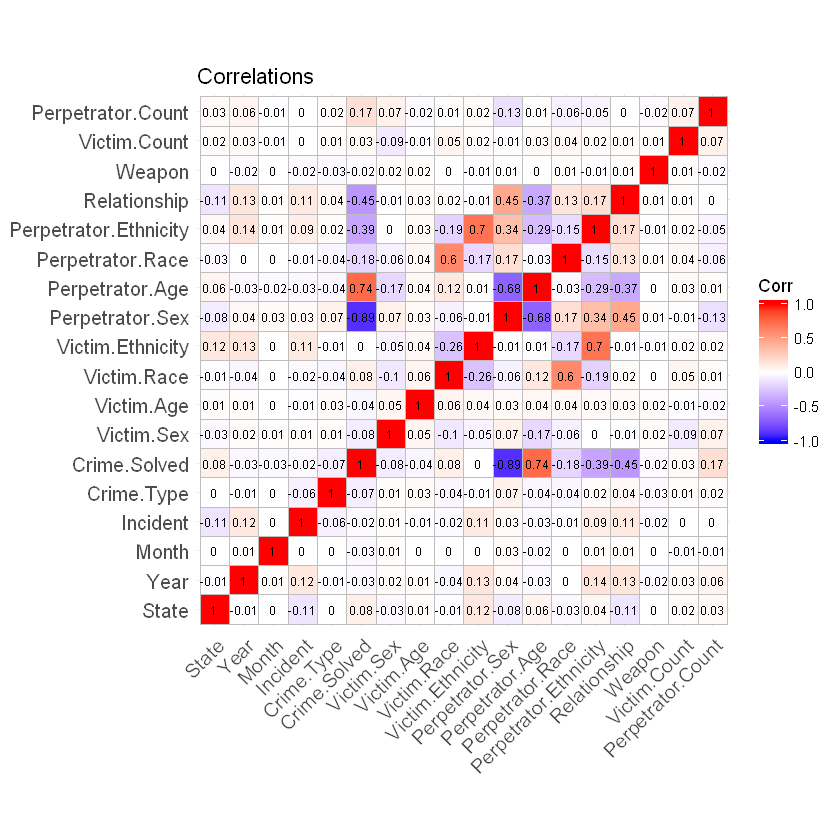

In [32]:
options(repr.plot.size=400)
p1<-ggcorrplot(hc.3,lab = T,lab_size = 2.5,title="Correlations")

p1

We can see many relationships from the plot, e.g., Perpetrator Age has positive relationship with Crime solved. This relationship can be varified using below code.

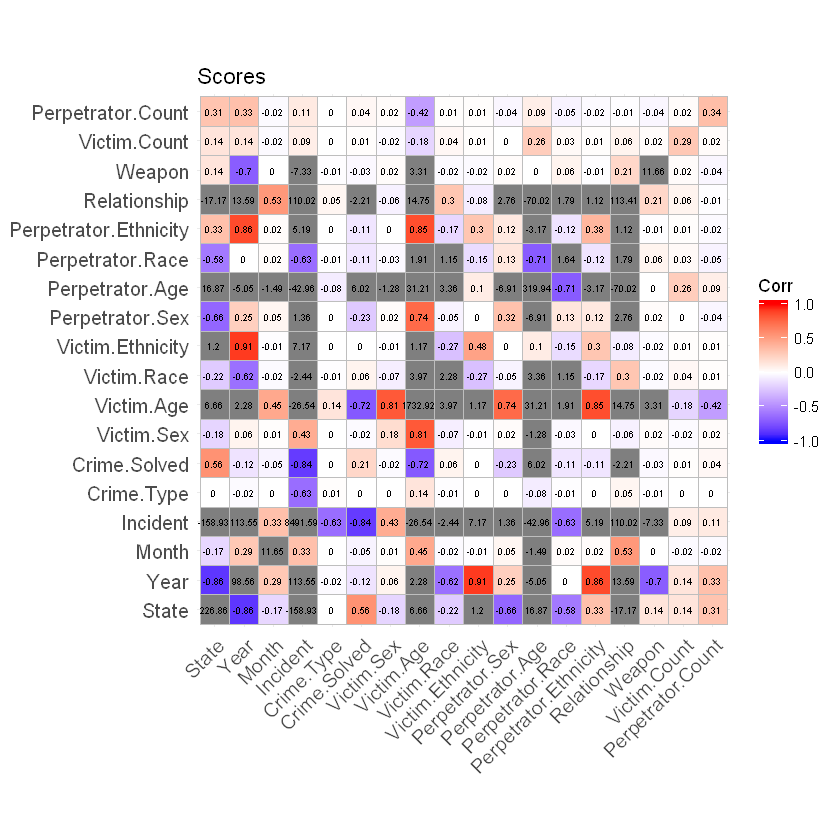

In [33]:
p2<-ggcorrplot(hc.4,lab = T,lab_size = 2,title = "Scores")
p2

Warning message:
"Removed 1 rows containing missing values (geom_point)."

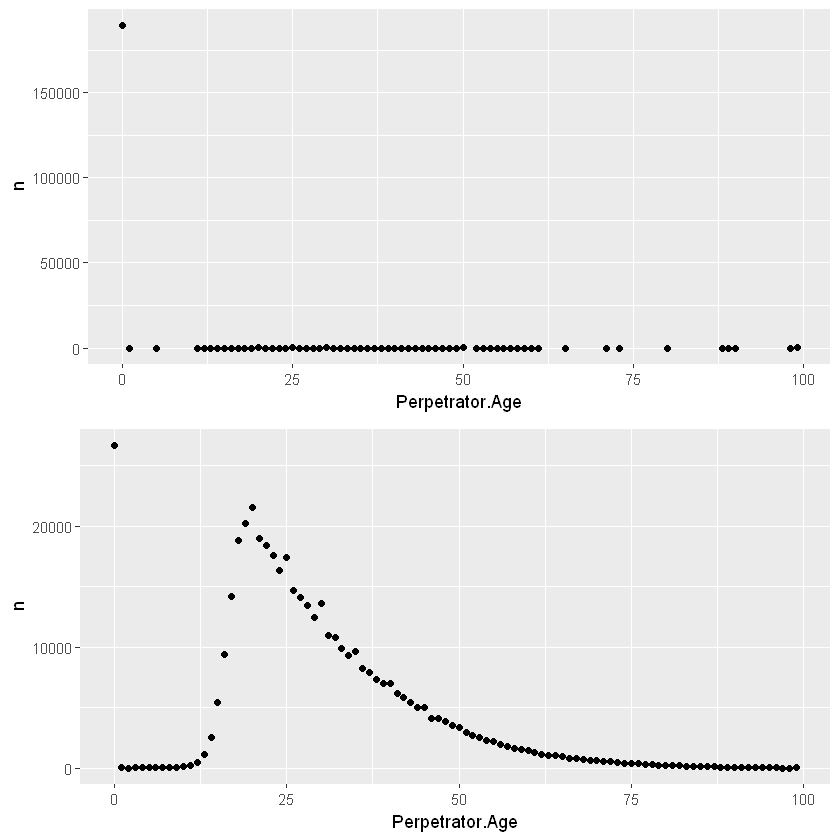

In [34]:
d1<-hc.1 %>% group_by(Crime.Solved,Perpetrator.Age) %>% 
  filter(Crime.Solved==2) %>% 
  count() %>%
  ungroup()


d2<-hc.1 %>% group_by(Crime.Solved,Perpetrator.Age) %>% 
  filter(Crime.Solved==1) %>% 
  count() %>%
  ungroup()

q2<-qplot(data=d1,x=Perpetrator.Age,y=n)
q1<-qplot(data = d2,x=Perpetrator.Age,y=n)

gridExtra::grid.arrange(q1,q2)

This code first counts all the records where Crime was Solved (all the observations with record = 1 means crime solved, 2 means crime not solved) Perpetrator age wise and then counts all the records where Crime was Unsolved. The number of Crimes solved in the Age range of 25-50 are quite higher. In fact, as the correlation figures(0.74) suggested, the rate of success for solving the crime increases from age 15, reaches peak around 19 and then start decresing till 75.

This analysis can bring out one more important rule of thumb in understanding the crime. The success probability of solving the crime is at peak in the age range of 19-50. Perpetrators of age range more than 55-60 either do not attempt homicide or do not get caught.

Age range can also suggest that the probability of using the Crime as social expression tool is quite higher. 

Another relation from the above correlation plot can be seen between Perpetrator's Sex (whether a female(1), or male(2)) Crime Solved. The ratio of Male perpetrator it self is higher than Female, but the ratio of Crime being solved when the perpetrator is a male is also high. This can be seen from the following graph. 

This could mean two inferences;
    
    Male Perpetrator crimes are very common in nature and easy to solve
    Female Perpetrator crimes are very rare in nature and difficult to solve
    
Nonetheless, in this analysis we will not dig down into this inference

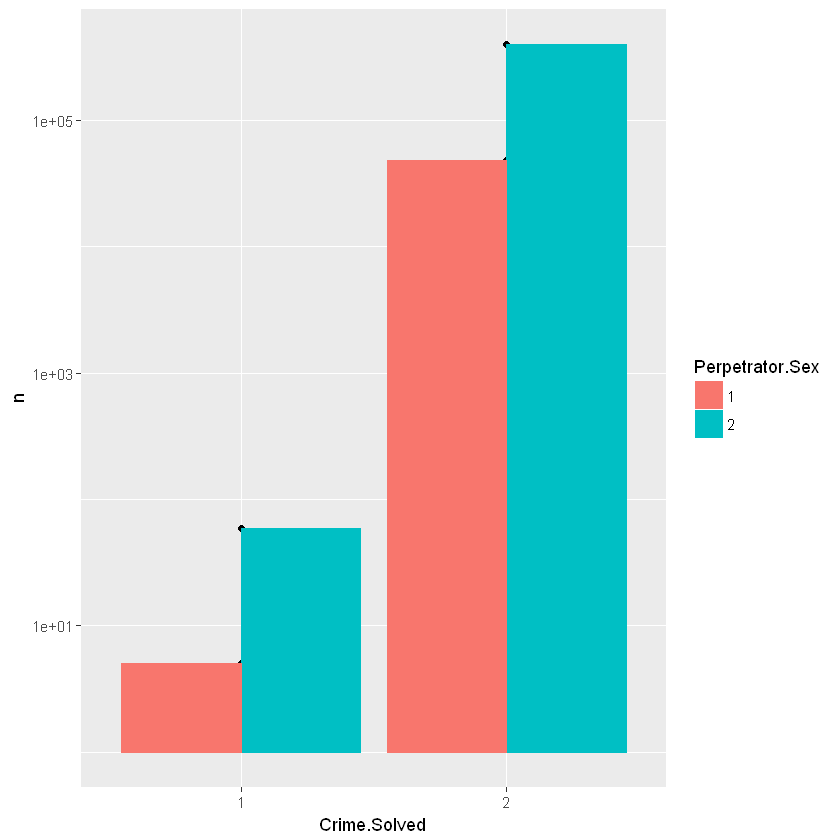

In [35]:
## Perpetrator Sex v Crime Solved
## We're converting the Y axis to *log* for a better visulisation
## Though, it may show only a fraction of height diffrence in the bar plot because of log conversion, 
## the actual difference in numbers of crime solved are much higher


d<- hc.1 %>% group_by(Perpetrator.Sex,Crime.Solved) %>% 
  filter(Perpetrator.Sex==1 | Perpetrator.Sex==2)%>%
  count() %>%
  mutate(ratio=sum(n)) %>%
  as.data.frame()

qplot(data = d,Crime.Solved,n) + 
  geom_bar(stat = "identity",position = "dodge",
           aes(color=Perpetrator.Sex,
               fill=Perpetrator.Sex)) + 
scale_y_log10()


The same correlation plot we made with simple *ggcorrplot* package can be made with *plotly* in 3d surface.
Below code will do the same.

((require(plotly)
p3<-plot_ly(z=hc.3,type = "surface",
        #x=row.names(hc.3),y=colnames(hc.3),
        #size = c(10,100),showscale=T,reversescale=F,
        #opacity=1,cauto=F)
p3))

**** This code is silent. You'll have to convert the cell to CODE from MARKDOWN

## Understanding predictive modelling

In this section we will use some of the predictive algorithm to predict the few of the variable. The process flow till now looks like;

    1) We filtered and cleaned the data in Pre-processing section
    2) We understood the correlations and variance of variables with each other
    3) During some of the instances we also understood the inferences one can make from Pre-processing and Correlations

Now we will try understand if the data variance and correlation can help use to build the predictive model or not.

We will start with **PCA (Principle Component Analysis)** technique. PCA will tell us the principle data fields on which the dataset's variation/standard deviation is dependent.

In [36]:
## PCA using princomp function

pca<-princomp(hc.2[,-19],cor=T,scores=T)

pca

Call:
princomp(x = hc.2[, -19], cor = T, scores = T)

Standard deviations:
   Comp.1    Comp.2    Comp.3    Comp.4    Comp.5    Comp.6    Comp.7    Comp.8 
1.7694480 1.4277866 1.1785470 1.0943298 1.0503674 1.0345282 1.0121225 1.0004183 
   Comp.9   Comp.10   Comp.11   Comp.12   Comp.13   Comp.14   Comp.15   Comp.16 
0.9967015 0.9552038 0.9331030 0.9157466 0.9024010 0.7853894 0.6381400 0.5601200 
  Comp.17   Comp.18 
0.4304824 0.3044042 

 18  variables and  638453 observations.

In [37]:
summary(pca)

Importance of components:
                          Comp.1    Comp.2     Comp.3     Comp.4     Comp.5
Standard deviation     1.7694480 1.4277866 1.17854697 1.09432981 1.05036735
Proportion of Variance 0.1739415 0.1132541 0.07716516 0.06653098 0.06129287
Cumulative Proportion  0.1739415 0.2871956 0.36436076 0.43089175 0.49218461
                           Comp.6     Comp.7     Comp.8     Comp.9    Comp.10
Standard deviation     1.03452824 1.01212251 1.00041831 0.99670154 0.95520383
Proportion of Variance 0.05945826 0.05691067 0.05560204 0.05518966 0.05068969
Cumulative Proportion  0.55164287 0.60855354 0.66415558 0.71934525 0.77003493
                          Comp.11    Comp.12    Comp.13   Comp.14    Comp.15
Standard deviation     0.93310301 0.91574658 0.90240102 0.7853894 0.63814000
Proportion of Variance 0.04837118 0.04658843 0.04524042 0.0342687 0.02262348
Cumulative Proportion  0.81840611 0.86499455 0.91023497 0.9445037 0.96712714
                          Comp.16    Comp.17     C

This analysis shows the Standard Deviation (SD) that each component(variable) is responsible for. The above table showcase the commulative proprtion of SD for the comps. First 9 comps totals a 72% of SD, meaning out of 18 comps if we consider first 9, we will be able to understand the 72% deviation in data.

The same can be plotted like the following graph. Conventionally we select variable which have Variance of >=1.

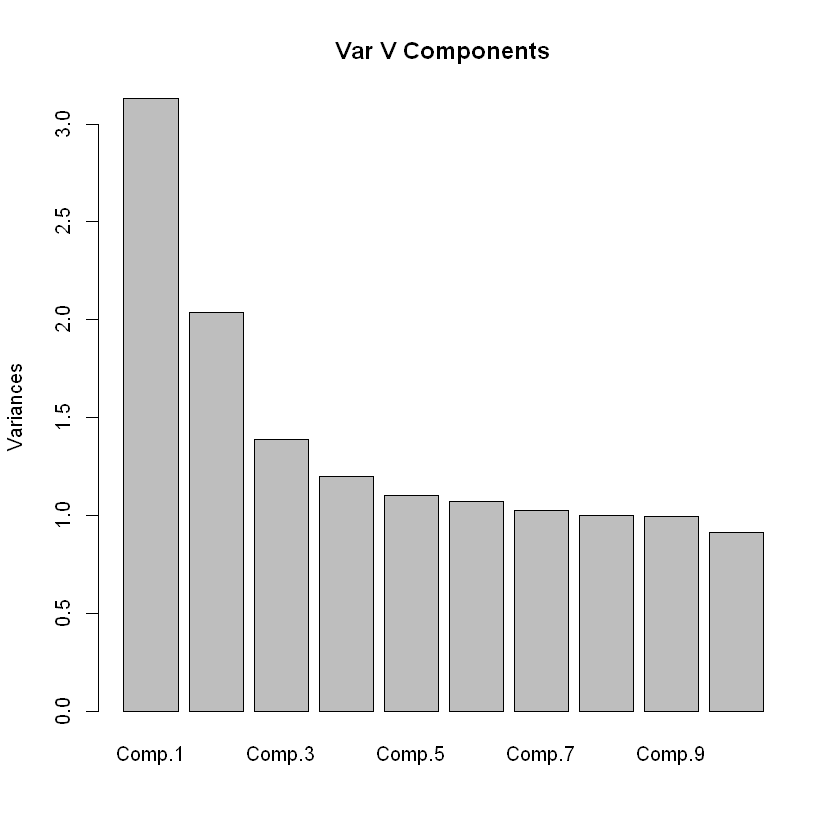

In [38]:
plot(pca, main="Var V Components")

The same graph for the Standard Deviations (SD) can be plotted like the following.

Warning message:
"Ignoring unknown parameters: NA"

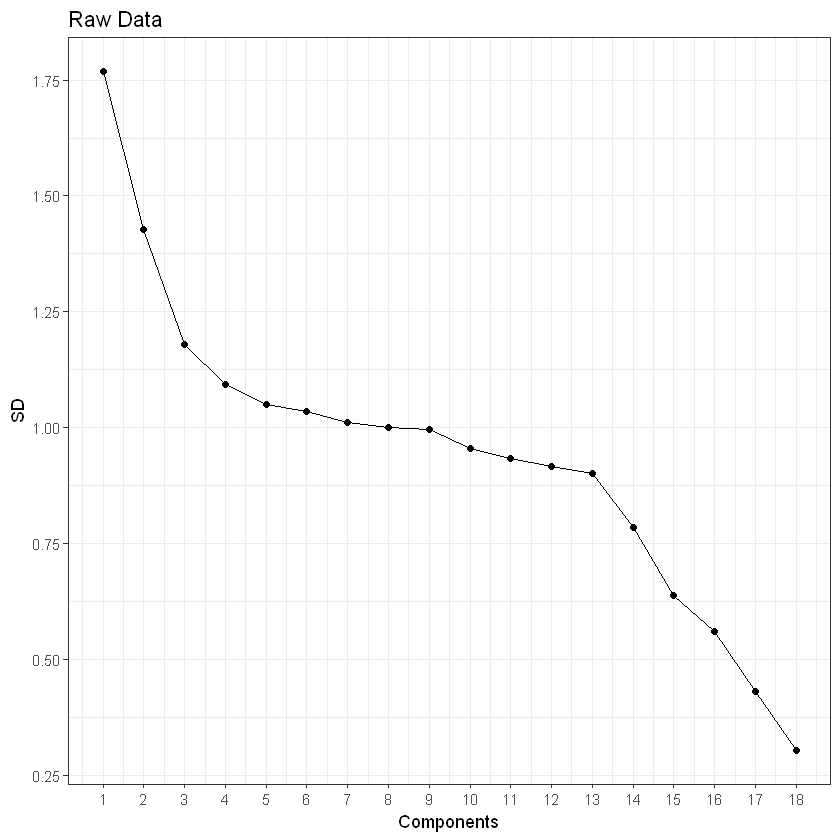

In [39]:
pca_sdev<-`colnames<-`(as.data.frame(pca$sdev),"sdv")

pca_sdev$names<- c(1:18)

p1<-qplot(pca_sdev,y=pca_sdev$sdv,x=pca_sdev$names) + 
labs(x="Components",y="SD") + geom_line() + 
scale_x_continuous(breaks=c(1:18)) +
scale_y_continuous(breaks=c(seq(0,2,0.25))) + 
theme_bw() + ggtitle("Raw Data")

p1

This graph shows the Standard Deviation (SD) and Components(variables) that are responsible for them.

We now can understand one definite chracteristic of the dataset from PCA. This is not a highly correlated dataset, meaninng that, each componenet adds a little bit variation to the data. When we will set up the Machine Learning algorithm in the next section, this information will help us to choose the impartant parameters/components/features/variables to consider. And form PCA we can justify a very well reconstruction using first 9 variables of the dataset.

## Understanding the predictive & learning models

In this section, we will try to implement few predictive and Machine Learning (ML) models to understand the dataset. These models will help us to get a knack on predictive nature of the Crimes. This is last section in Understanding the data, in the next section we will try to come up with the significant and important questions that can be asked and answered by Understanding the dataset. 

Prior to using any predictice & learning models we'll reduce the noise in the dataset. This will help us to define reliable predictors.

Since, most of the variables are factors/categorical variables, we can start with Classification models. We'll use two models, Naive bayes and Random forest.

In smoothing the noise out we will consider two variables. Perpetrator Age & Victim Age.

In [40]:
hc_smooth<-as.data.frame(hc.2) %>% filter(Victim.Age>=0,
                           Victim.Age<=99,
                           Perpetrator.Age>=5,
                           Perpetrator.Age<=99) %>% select(-Record.Source)

head(hc_smooth)

State,Year,Month,Incident,Crime.Type,Crime.Solved,Victim.Sex,Victim.Age,Victim.Race,Victim.Ethnicity,Perpetrator.Sex,Perpetrator.Age,Perpetrator.Race,Perpetrator.Ethnicity,Relationship,Weapon,Victim.Count,Perpetrator.Count
2,1980,1,1,2,2,2,14,3,3,2,15,3,3,1,1,0,0
2,1980,3,1,2,2,2,43,5,3,2,42,5,3,1,14,0,0
2,1980,4,1,2,2,2,43,5,3,2,42,5,3,1,14,0,0
2,1980,5,1,2,2,2,30,5,3,2,36,5,3,1,12,0,0
2,1980,5,2,2,2,1,42,3,3,2,27,2,3,28,10,0,0
2,1980,6,1,2,2,1,99,5,3,2,35,5,3,28,10,0,0


In [41]:
dim(hc_smooth)
dim(hc.2)

[1] 421699     18

[1] 638453     19

As you can notice, Smoothing has reduced the data by almost 200,000 data points/rows. If we plot the correlations with the new data you can observe the difference clearly. Let's do it.

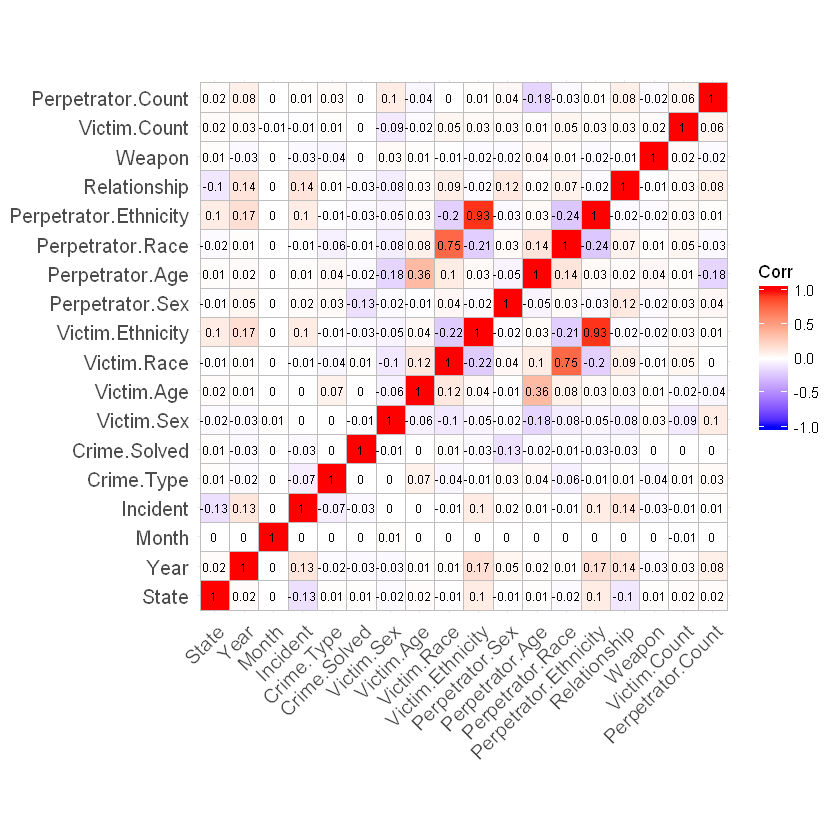

In [42]:
hc.5<-round(cor(hc_smooth,hc_smooth),digits = 2)
ggcorrplot(hc.5,lab = T,lab_size = 2.5)

Importance of components:
                          Comp.1     Comp.2    Comp.3     Comp.4     Comp.5
Standard deviation     1.5327229 1.32670696 1.2010376 1.10493808 1.07167344
Proportion of Variance 0.1305133 0.09778619 0.0801384 0.06782712 0.06380466
Cumulative Proportion  0.1305133 0.22829949 0.3084379 0.37626501 0.44006968
                          Comp.6     Comp.7     Comp.8     Comp.9    Comp.10
Standard deviation     1.0298952 1.02310870 1.00745946 0.99841177 0.96312941
Proportion of Variance 0.0589269 0.05815286 0.05638748 0.05537923 0.05153435
Cumulative Proportion  0.4989966 0.55714943 0.61353691 0.66891613 0.72045048
                          Comp.11    Comp.12    Comp.13    Comp.14    Comp.15
Standard deviation     0.94547947 0.92454491 0.90840541 0.89067778 0.86904821
Proportion of Variance 0.04966286 0.04748796 0.04584447 0.04407261 0.04195804
Cumulative Proportion  0.77011334 0.81760130 0.86344576 0.90751837 0.94947641
                          Comp.16    Comp.17     C

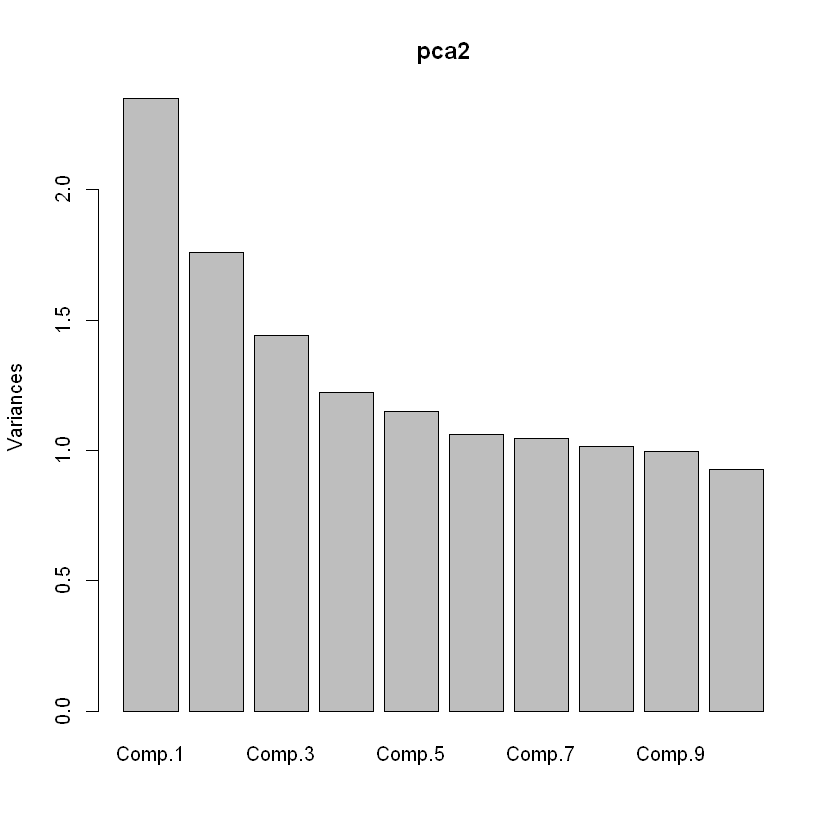

In [43]:
pca2<-princomp(hc_smooth,cor=T,scores=T)
plot(pca2)
summary(pca2)

Warning message:
"Ignoring unknown parameters: NA"

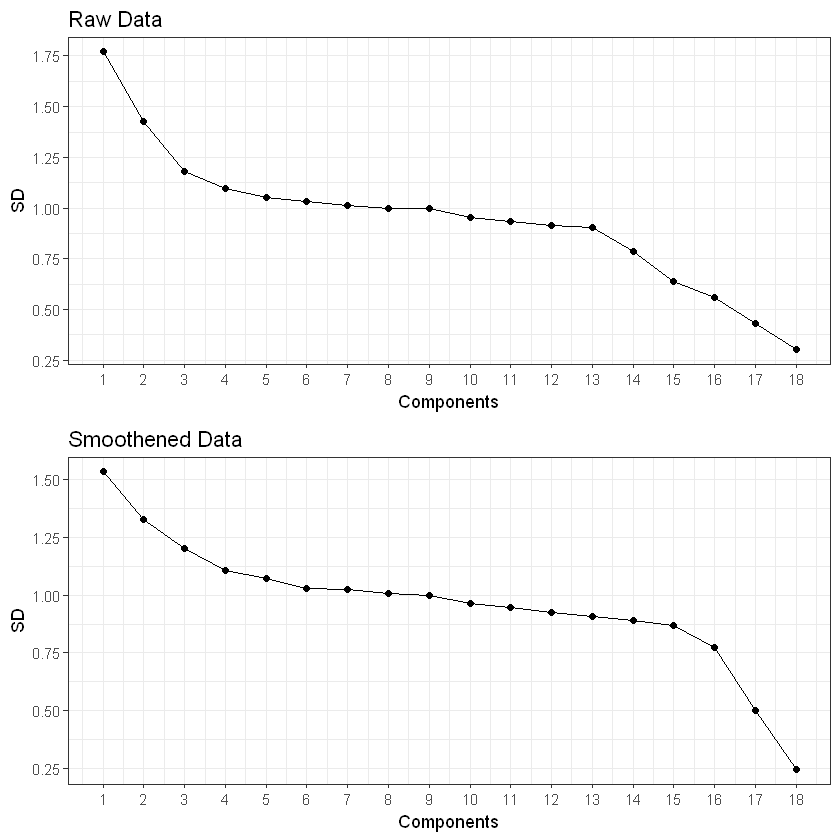

In [44]:
pca2_sdev<-`colnames<-`(as.data.frame(pca2$sdev),"sdv")

pca2_sdev$names<- c(1:18)

q1<-qplot(pca2_sdev,y=pca2_sdev$sdv,x=pca2_sdev$names) + 
  labs(x="Components",y="SD") + geom_line() + 
  scale_x_continuous(breaks=c(1:18)) +
  scale_y_continuous(breaks=c(seq(0,2,0.25))) + 
  theme_bw() + ggtitle("Smoothened Data")

gridExtra::grid.arrange(p1,q1)

This shows the changes in the behaviour of the Data. In the Raw form, the SD (Standard Deviation) starts to decline from the 13th Component whereas in Smoothened version, this drops steeply from the 15th Component.

In the Coorelations plot also, the change of function is evidential.

For e.g., in the Raw Data version the function of Crime Solved can be written as,

*f(CS) ~ Perpetrator Sex (-0.89) + Perpetrator Age (0.75) + Perpetrator Race (-0.18) + Perpetrator Ethnicity(-0.39) + Relationship (-0.45)*

If we consider the Smoothened Data the function of Crime Solved has only one Strong Correlation (-0.13) with Perpetrator Sex

*f(CS) ~ Perpetrator Sex (-0.13)*

This changes the scenarios a lot while selecting the features to generate the learning and predictive models.

Let's try to build a predictive model with a classification algorithm - Naive Bayes. We'll use the **SparklyR** package and **Spark** to build this model.

In [45]:
require(sparklyr)
sc<-spark_connect(master="local")

Loading required package: sparklyr


In [46]:
# First, Import the local data as spark dataframe

import_hc<- copy_to(sc,hc_smooth,"hc_spark",overwrite = T)

# Now, let's partition the data for training and testing

partition<- sdf_partition(import_hc,training=0.8, testing=0.2,seed = 2017)

# Lastly, let's register the spark tables for training and testing

partitioned_hc<-sdf_register(partition,c("spark_hc_training","spark_hc_test"))

train_hc <- tbl(sc,"spark_hc_training")
test_hc <- tbl(sc,"spark_hc_test")

This code has created a local spark cluster, imported the data to that cluster, partitioned it in 8:2 ratio for training and testing and registered two spark tables containing the parititioned data.

Let's now develope the Naive Bayes learning model.

In [47]:
model_nb <- train_hc %>% ml_naive_bayes(Crime_Solved~.,lambda = 2)

* No rows dropped by 'na.omit' call


This code has developed the model. We are interested in the learning the Crime Solved variable. How it behaves in the dataset and can we learn its magnitude and pattern in a way that we can later on predict it using the developed model over the test dataset.

Let see the summary of the model.

In [48]:
summary(model_nb)

Call: ml_naive_bayes(., Crime_Solved ~ ., lambda = 2)

A-priority probabilities:
[1] 0.00150034 0.99849966

Conditional probabilities:
                              [,1]         [,2]
State                 1.015138e-02 1.137839e-02
Year                  8.929737e-01 9.267021e-01
Month                 2.970251e-03 3.024159e-03
Incident              3.864244e-02 9.478989e-03
Crime_Type            8.895719e-04 9.194458e-04
Victim_Sex            8.214834e-04 8.109434e-04
Victim_Age            1.515367e-02 1.542331e-02
Victim_Race           1.486452e-03 1.674873e-03
Victim_Ethnicity      1.301640e-03 1.142290e-03
Perpetrator_Sex       1.311367e-03 8.763755e-04
Perpetrator_Age       1.634655e-02 1.427503e-02
Perpetrator_Race      1.743773e-03 1.629880e-03
Perpetrator_Ethnicity 1.328168e-03 1.142250e-03
Relationship          1.081546e-02 7.258841e-03
Weapon                3.880161e-03 4.089503e-03
Victim_Count          6.720424e-05 6.190309e-05
Perpetrator_Count     1.167232e-04 1.116826e-04



Call: ml_naive_bayes(., Crime_Solved ~ ., lambda = 2)

A-priority probabilities:
[1] 0.00150034 0.99849966

Conditional probabilities:
                              [,1]         [,2]
State                 1.015138e-02 1.137839e-02
Year                  8.929737e-01 9.267021e-01
Month                 2.970251e-03 3.024159e-03
Incident              3.864244e-02 9.478989e-03
Crime_Type            8.895719e-04 9.194458e-04
Victim_Sex            8.214834e-04 8.109434e-04
Victim_Age            1.515367e-02 1.542331e-02
Victim_Race           1.486452e-03 1.674873e-03
Victim_Ethnicity      1.301640e-03 1.142290e-03
Perpetrator_Sex       1.311367e-03 8.763755e-04
Perpetrator_Age       1.634655e-02 1.427503e-02
Perpetrator_Race      1.743773e-03 1.629880e-03
Perpetrator_Ethnicity 1.328168e-03 1.142250e-03
Relationship          1.081546e-02 7.258841e-03
Weapon                3.880161e-03 4.089503e-03
Victim_Count          6.720424e-05 6.190309e-05
Perpetrator_Count     1.167232e-04 1.116826e-04



This summary shows how the NB worked on the dataset provided. It found the prior probabilities and then compared it with conditional probabilities for Yes(2) and No(1)

We have trained the model on the train dataset, now let's use the model to predict the Crime Solved parameter in test dataset. The following code will take in the trained model and test dataset in the arguments and creates a seperate prediction column in the stored vector. This prdiction column can be used to compare the original v predicted results.

In [49]:
pred_nb <- sdf_predict(model_nb,test_hc) %>% collect()

Now, let's prepare a comperative table of Actual Yes and No in the Crime Solved column v the Predicted column Yes and No

In [50]:
t2<-table(pred_nb$Crime_Solved,pred_nb$prediction)
t2

   
        0     1
  1    26   103
  2  5181 79136

This small table shows that, when in Actual it was No(1) the algorithm predicted 26 times No(0) and 103 times Yes(1). This means that the algorithm was wrong 115 times out of 26+103 = 129 times.

The same calculation goes for Yes(2). It predicted 5181 times No(0) and 79136 times Yes(1). The accuracy is 79136 out of 5181+79136 = 84317.

In total, the algorithm was accurate 26+79136 = 79162 times out of 26+103+5181+79136 = 84446. So, the accuracy is 
79162/84446 = 0.937427468 ... or 93.74%.

Same calculation is shown below.

In [51]:
((t2[1,1] + t2[2,2])/nrow(pred_nb)*100)

[1] 93.74275

We have set seed as 2017 prior to running the algorithm so in each run the accuracy level will be the same.

Now we have set in a process flow on how to train the algorithm, build the model, predict it with the test data and measure the accuracy level. We can use this process flow and observe the other algorithms also. Let's try with RFM (Random Forest Model).

Below codes will repeat the process flow; build and train the model, predict with it and measure the accuracy level.

In [52]:
model_rfm <- train_hc %>%
  ml_random_forest(Crime_Solved~.,num.trees = 25,type = "classification")

pred_rfm <- sdf_predict(model_rfm, test_hc) %>% collect()

* No rows dropped by 'na.omit' call


In [53]:
t<-table(pred_rfm$Crime_Solved,pred_rfm$prediction)
t

   
        1     2
  1   123     6
  2     0 84317

In [54]:
((t[1,1] + t[2,2])/nrow(pred_rfm)*100)

[1] 99.99289

As we can see that, the RFM worked at a better level of accuracy than of NB.

Let's now use the K-means model. We'll build and train the model, predict the model and measure the accuracy.

In [55]:
model_kmeans<- train_hc %>% select(Crime_Solved,
                                   State,
                                   Crime_Type,
                                   Victim_Sex,
                                   Victim_Age,
                                   Victim_Race,
                                   Victim_Ethnicity,
                                   Perpetrator_Sex,
                                   Perpetrator_Age,
                                   Perpetrator_Race,
                                   Perpetrator_Ethnicity,
                                   Relationship,
                                   Weapon) %>% 
                            ml_kmeans(centers=2,iter.max = 1000,compute.cost = T,ml.options = ml_options(only.model = F))

* No rows dropped by 'na.omit' call


In [56]:
print(model_kmeans)

K-means clustering with 2 clusters

Cluster centers:
  Crime_Solved    State Crime_Type Victim_Sex Victim_Age Victim_Race
1     1.998179 25.35169   1.987605   1.672950   53.03599     3.90169
2     1.998653 24.11319   1.976339   1.779447   24.26416     3.47263
  Victim_Ethnicity Perpetrator_Sex Perpetrator_Age Perpetrator_Race
1         2.511656        1.864287        40.52371         3.759179
2         2.437199        1.899651        26.33430         3.397805
  Perpetrator_Ethnicity Relationship   Weapon
1              2.506088     16.03609 8.679605
2              2.439717     15.46596 8.862633

Within Set Sum of Squared Errors =  212962113

In [57]:
pred_kmeans<-sdf_predict(model_kmeans,test_hc) %>% collect()
t2<-table(pred_kmeans$Crime_Solved,pred_kmeans$prediction)
t2

   
        0     1
  1    52    77
  2 26218 58099

In [58]:
((t2[1,1] + t2[2,2])/nrow(pred_kmeans)*100)

[1] 68.86176

As we can notice that, the accuracy of K-means algorithm is just ~69% as compared to NB (~94%) and RFM (~99.99%).

**** There are many parameters on which these models can be compared aprt from the Accuracy. Accuracy may not be the only and final measure to understand the model's efficiency over the given data.

Summary of learning and predicting,
Disclaimer,
Questions to be asked
What is not covered up
Create a copy of the notebook and  Silent the Sparklyr codes to upload it to the Kaggle

This section now lead us to the end of this article. There are still few aspects of the data which I wasn't able to cover in this article because of limited time available. Some of them are listed below.

## Questions to dataset !

One can ask some of the given questions to this dataset. This questions' answers will help to understand the dataset more in depth.

    1) Is there any sepcific distribution pertaining to Years? 
    If the Crime Incidents are higher than normal average in any particular Year, one can understand the situations or socio-eco-political events, state-wise to evaluate the reasoning.
    
    2) Is there any specific Crime Type common over the Years, State with Specific Weapon over the Victim & Perpetrator Age  range, Sex, Race and Ethnicity? Does the relation between Victim and Perpetrator showcase any specific deduction? 
    (In depth analysis done by --  Kheirallah Samaha http://bit.ly/2m1dH1z)
    
    3) Is there any specific crime pattern State-wise which can be predicted? 
    May be one can train the model specific to any state to predict the Age range, Relationship based on Victim and Perpetrator Race & Ethnicity. 
    This will help the authorities to understand the involvement of a perpetrator where most of the details are hard to define or not available at all.

## Covered and missed !

Though, I was able to cover the data pre-processing, correlations & implications of them, model development and prediction using them, I have missed many of the crucial aspects of process in each segment. I may try to make few anecdotals to this version in future containing my understanding of these sections.

## Disclaimer !!

In no way, this is the complete and only work that can be prepared on this dataset, neither this work is immune to fatal error. This is just a try to understand and explore individual skillset in datascience.

**** All the codes are reproducible

**** I had to silent the Modelling part in Spark as I am yet to learn how Spark can be rolled out over the Kaggle scripting frames, but it is very easy if one wants to reproduce this part; just convert the MARKDOWN cells to CODE and run it on the local system


#### Comments are always welcomed & if you like the effort please share & vote

Thanks !